Dans cet article, nous allons examiner les données de l'UCI sur le vin, puis former plusieurs classificateurs scikit-learn pour prédire les classes de vin.

Nous allons nous concentrer sur une petite base de données de vins qui contient une étiquette catégorielle pour chaque vin ainsi que plusieurs caractéristiques à valeur continue. Il existe trois "catégories" de vin différentes et notre objectif sera de classer un vin non étiqueté en fonction de ses caractéristiques telles que le taux d'alcool, la saveur, la teinte, etc.

## Support Vector Machines 

# Les avantages des machines à vecteurs de support sont :

- Efficace dans les espaces de grande dimension.

- Toujours efficace dans les cas où le nombre de dimensions est supérieur au nombre d’échantillons.

- Utilise un sous-ensemble de points d’entraînement dans la fonction de décision (appelés vecteurs de support), de sorte qu’il est également efficace en mémoire.

- Polyvalent : différentes fonctions du noyau peuvent être spécifiées pour la fonction de décision. Des noyaux communs sont fournis, mais il est également possible de spécifier des noyaux personnalisés.

# Les inconvénients des machines à vecteurs de support comprennent:

- Si le nombre de fonctionnalités est beaucoup plus grand que le nombre d’échantillons, évitez de trop ajuster le choix des fonctions du noyau et le terme de régularisation est crucial.

- Les SVM ne fournissent pas directement d’estimations de probabilité, celles-ci sont calculées à l’aide d’une validation croisée coûteuse quintuple.

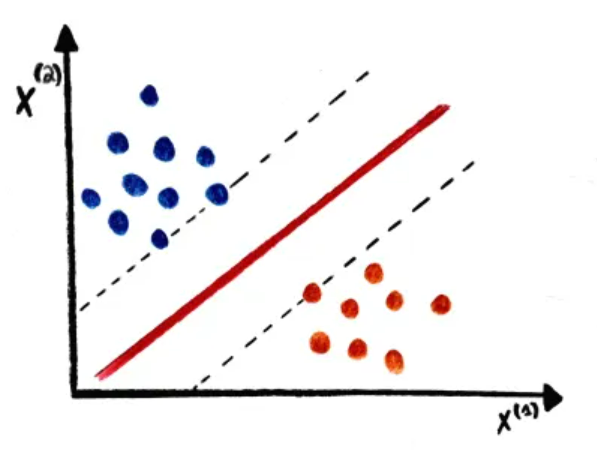

In [1]:
# Jupyter notebook
from PIL import Image
from IPython.display import display

# And let's just look at the image I'm talking about
im = Image.open("svm1.png")
display(im)

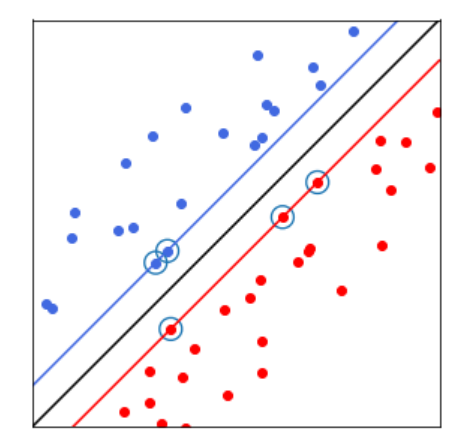

In [2]:
im1 = Image.open("svm.png")
display(im1)

##### - les SVM visent à résoudre les problèmes de classification en trouvant de bonnes frontières de décision

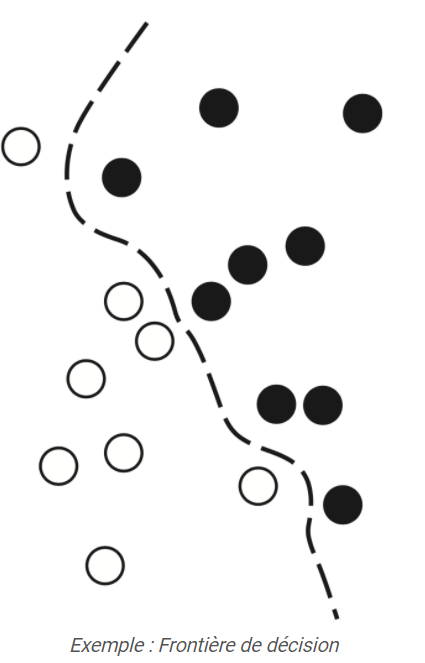

In [3]:
im2 = Image.open("front_de_decision.png")
display(im2)

#### - Cette technique utilisée par les Support Vector Machines est appelée « kernel trick" ou "l'astuce du noyau" 
#### -  L'idée est de transformer l'espace de représentation des données d'entrées en un espace de plus grande dimension 
#### - puis détermine comment séparer les données en fonction du label

#### Exemple de SVM sur la data Wine de sklearn

# SVM classification
Pour la classification, la bibliothèque scikit-learn de Python met en place trois classes : SVC, NuSVC et LinearSVC.

pip install shutup

In [1]:
import shutup; shutup.please()

ModuleNotFoundError: No module named 'shutup'

In [6]:
#Import du data set et des libs
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
#chargement du jeu de donnees
raw_data = datasets.load_wine()
raw_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

#### Exploratuion de la data

In [8]:
print("Description :", raw_data.DESCR)

Description : .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash

In [9]:
for key,value in raw_data.items():
    print(key,'\n',value,'\n')

data 
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] 

target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

frame 
 None 

target_names 
 ['class_0' 'class_1' 'class_2'] 

DESCR 
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in 

##### Everything looks good. We are most interested in the 'data' and 'target' fields. Let's quickly check their shapes.

In [10]:
print('data.shape\t',raw_data['data'].shape,
      '\ntarget.shape \t',raw_data['target'].shape)

data.shape	 (178, 13) 
target.shape 	 (178,)


In [11]:
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data['target']
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])

#### À ce niveau on peut faire un head() et un describe() pour mieux appréhender le dataFrame que nous venons de créer.

In [12]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [14]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### Un peu de visualisation…

#### Le describe() nous montre que la moyenne d’alcool contenu dans les vins est d’envrion 13%. Essayons de visualiser la distribution d’alcool pour chaque catégorie de vin.

##### Répartition de la teneur en alcool entre tous les vins

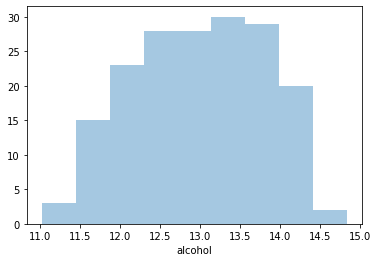

In [15]:
sns.distplot(data['alcohol'],kde=0);

### Répartition de la teneur en alcool par classe

In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

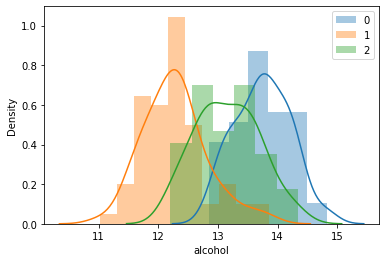

In [18]:
for i in data.target.unique():
    sns.distplot(data['alcohol'][data.target==i],kde=1,label="{}".format(i));
plt.legend();

Fait intéressant, les trois classes semblent se séparer naturellement en tant que distrubtions d’alcool faibles / moyennes / élevées. 
Quelles sont les distributions des classes pour le reste des entités ? Nous utiliserons la méthode de Seaborn afin de pouvoir distinguer proprement chaque classe. 
Cependant, notez que cela met à l’échelle l’axe des y de sorte que l’intégrale sous chaque courbe soit 1.

alcohol


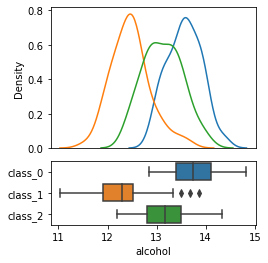

malic_acid


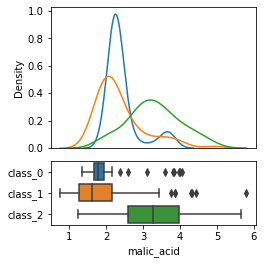

ash


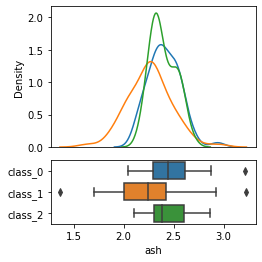

alcalinity_of_ash


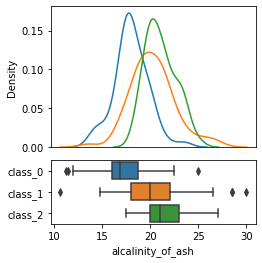

magnesium


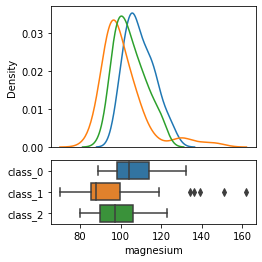

total_phenols


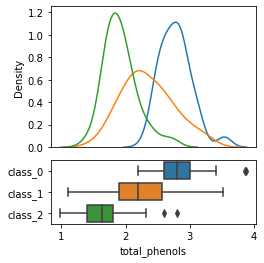

flavanoids


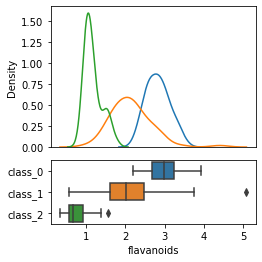

nonflavanoid_phenols


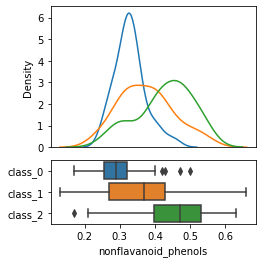

proanthocyanins


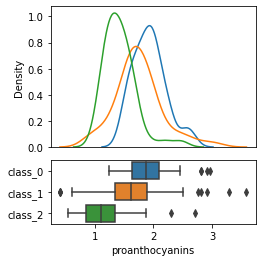

color_intensity


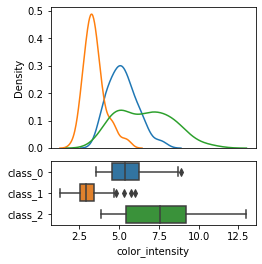

hue


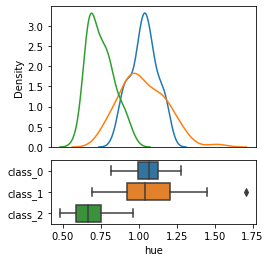

od280/od315_of_diluted_wines


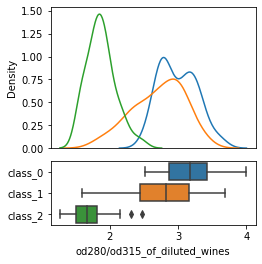

proline


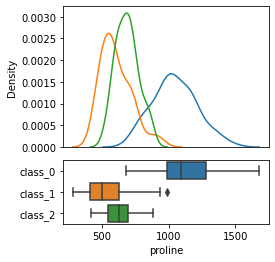

In [19]:
import matplotlib.gridspec as gridspec
for feature in raw_data['feature_names']:
    print(feature)
    #sns.boxplot(data=data,x=data.target,y=data[feature])
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=data,ax=ax2)
    sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
    sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
    sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()

# Split data

Afin d’entraîner et de tester efficacement notre modèle, nous devons séparer les données dans un ensemble d’entraînement 
que nous alimenterons notre modèle le long des étiquettes de formation. 
Ensuite, après avoir entraîné le modèle, nous le testerons sur les données de « test », 
afin de pouvoir évaluer l’applicabilité réelle du modèle.

- Scikit-learn a une fonctionnalité utile ici avec la méthode "train_test_split()". 
- test_size régit la proportion de données qui est réservée aux tests.
- Nous voulons nous entraîner sur suffisamment de données pour que notre modèle puisse faire de bonnes prédictions, 
mais nous avons également besoin de suffisamment de données de test pour déterminer si nous avons surajusté le modèle. 
- Nous utiliserons 20 % des données pour les tests.

In [21]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = \
    train_test_split(raw_data['data'], raw_data['target'],
                     test_size=0.2)

In [22]:
print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )

142  samples in training data
 36  samples in test data



# Model selection/validation

- Il y a beaucoup algorithmes de classification à choisir 
- Alors jetons-les tous à notre problème et choisissons celui qui est le plus performant. 
- Pour ce faire, nous allons créer un dictionnaire de tous les classificateurs scikit-learn.

- Certains classificateurs dépendent dun ou plusieurs hyperparamètres ou techniques de régularisation dont les valeurs optimales ne sont pas connues à lavance. 
- Afin de trouver les paramètres optimaux, nous pouvons simplement adopter une approche de force brute où nous les testons tous, 
et garder le modèle qui a le score de validation croisée le plus élevé.
- Ci-dessous, nous allons effectuer GridSearchCV pour trouver les hyperparamètres optimaux inclus dans le dictionnaire ci-dessous.

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier

In [108]:
dict_classifiers = {
    "Logistic Regression": 
            {'classifier': LogisticRegression(),
                'params' : [
                            {
                             'penalty': ['l1','l2'],
                             'C': [0.001,0.01,0.1,1,10,100,1000]
                            }
                           ]
            },
    "Nearest Neighbors": 
            {'classifier': KNeighborsClassifier(),
                 'params': [
                            {
                            'n_neighbors': [1, 3, 5, 10],
                            'leaf_size': [3, 30]
                            }
                           ]
            },
             
    "Linear SVM": 
            {'classifier': SVC(),
                 'params': [
                            {
                             'C': [1, 10, 100, 1000],
                             'gamma': [0.001, 0.0001],
                             'kernel': ['linear']
                            }
                           ]
            },
    "Gradient Boosting Classifier": 
            {'classifier': GradientBoostingClassifier(),
                 'params': [
                            {
                             'learning_rate': [0.05, 0.1],
                             'n_estimators' :[50, 100, 200],
                             'max_depth':[3,None]
                            }
                           ]
            },
    "Decision Tree":
            {'classifier': tree.DecisionTreeClassifier(),
                 'params': [
                            {
                             'max_depth':[3,None]
                            }
                             ]
            },
    "Random Forest": 
            {'classifier': RandomForestClassifier(),
                 'params': {}
            },
    "Naive Bayes": 
            {'classifier': GaussianNB(),
                 'params': {}
            }
}

- Lorsque l'on adapte des classificateurs, il est utile de se faire une idée de leur pouvoir prédictif en fonction du nombre d'échantillons d'apprentissage. 
- Ceci est visualisé sous la forme d'une "courbe d'apprentissage".
- ci-dessous une méthode tirée de la documentation de Scikit Learn qui trace le score de formation (la précision du modèle sur les données de formation) ainsi que le score de validation croisée (qui mesure la précision sur les données exclues de l'ensemble de formation)
- Un bon modèle devrait être capable de capturer la majeure partie de la complexité des données d'apprentissage (sinon, nous avons besoin d'un modèle avec moins de biais) et le score de validation devrait augmenter avec plus de données d'apprentissage. Ce comportement indique que le modèle se généralisera bien au fur et à mesure que nous collectons plus de données.

In [109]:
from sklearn.model_selection import learning_curve 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.6, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Comparer les classificateurs
- Liens utiles : https://ataspinar.com/2017/05/26/classification-with-scikit-learn/

For each classifier, we'll perform an exhaustive grid search where each combination of hyperparameters are cross-validated using StratifiedKfold with 10 folds. This means, the data is split into 10 sets, trained on 9 of them and tested on the rest which gives the cross-validation score. The grid search then selects the combination of parameters that gives the best cv score.

Une fois les paramètres optimaux trouvés, nous adaptons chaque modèle à l'ensemble complet de l'apprentissage. Ensuite, nous calculons la précision des prédictions sur l'ensemble d'apprentissage et l'ensemble de test pour voir dans quelle mesure le modèle se généralise aux données qu'il n'a jamais vues. Nous trions les modèles en fonction de leurs prédictions sur l'ensemble de test, qui est le véritable test d'un classificateur pour les données du "monde réel".

En outre, nous tracerons la courbe d'apprentissage comme expliqué ci-dessus.

In [110]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
num_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(
        data=np.zeros(shape=(num_classifiers,4)),
        columns = ['classifier',
                   'train_score', 
                   'test_score',
                   'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        grid = GridSearchCV(classifier['classifier'], 
                      classifier['params'],
                      refit=True,
                        cv = 10, # 9+1
                        scoring = 'accuracy', # scoring metric
                        n_jobs = -1
                        )
        estimator = grid.fit(X_train,
                             Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = estimator.score(X_train,
                                      Y_train)
        test_score = estimator.score(X_test,
                                     Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key,
                                                    f=t_diff))
        count+=1
        plot_learning_curve(estimator, 
                              "{}".format(key),
                              X_train,
                              Y_train,
                              ylim=(0.75,1.0),
                              cv=10)
    return df_results

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.80285714        nan 0.92238095        nan 0.93666667
        nan 0.93619048        nan 0.93              nan 0.94333333
        nan 0.94333333]
  warnings.warn(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


trained Logistic Regression in 0.34 s


C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.7375            nan 0.88214286        nan 0.94821429
        nan 0.94642857        nan 0.93214286        nan 0.91785714
        nan 0.90535714]
  warnings.warn(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.73611111   

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.72321429        nan 0.92142857        nan 0.93392857
        nan 0.93392857        nan 0.93392857        nan 0.93392857
        nan 0.89464286]
  warnings.warn(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.71527778   

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.75178571        nan 0.90714286        nan 0.94821429
        nan 0.96071429        nan 0.94821429        nan 0.93214286
        nan 0.93214286]
  warnings.warn(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.74861111   

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.74821429        nan 0.87857143        nan 0.90714286
        nan 0.90892857        nan 0.90892857        nan 0.89464286
        nan 0.89285714]
  warnings.warn(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.74166667   

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.77321429        nan 0.87678571        nan 0.93392857
        nan 0.96071429        nan 0.93392857        nan 0.93392857
        nan 0.93214286]
  warnings.warn(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.74861111   

trained Nearest Neighbors in 0.11 s
trained Linear SVM in 0.31 s
trained Gradient Boosting Classifier in 1.23 s
trained Decision Tree in 0.03 s
trained Random Forest in 0.22 s
trained Naive Bayes in 0.03 s


,classifier,train_score,test_score,training_time
0,Logistic Regression,0.950704,1.000000,0.343750
5,Random Forest,1.000000,1.000000,0.218750
6,Naive Bayes,0.985915,1.000000,0.031250
2,Linear SVM,1.000000,0.972222,0.312500
3,Gradient Boosting Classifier,1.000000,0.972222,1.234375
4,Decision Tree,1.000000,0.944444,0.031250
1,Nearest Neighbors,1.000000,0.833333,0.109375


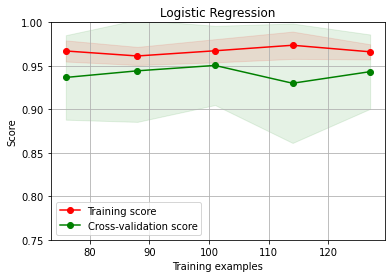

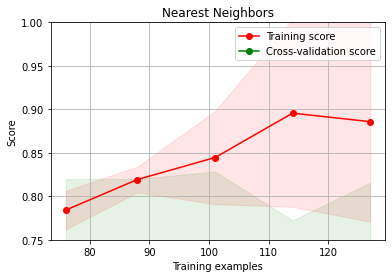

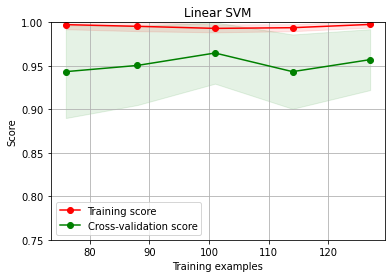

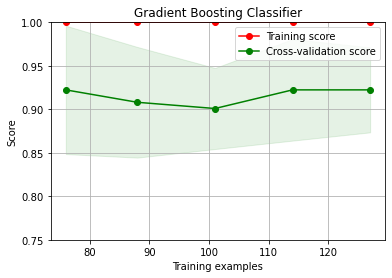

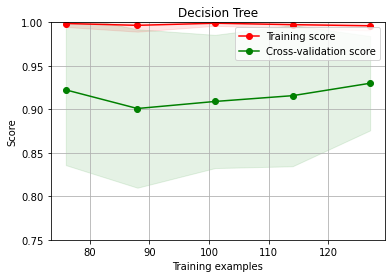

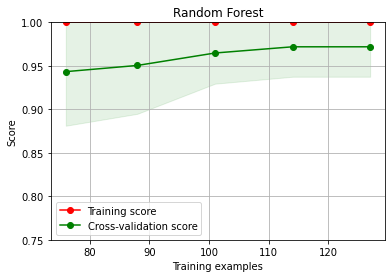

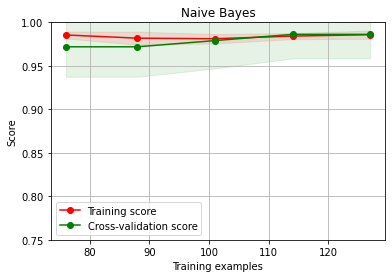

In [111]:
df_results = batch_classify(X_train, y_train, X_test, y_test)
display(df_results.sort_values(by='test_score', ascending=False))

Il semble que tous les classificateurs fonctionnent raisonnablement bien, à l'exception de Nearest Neighbors. Il est intéressant de noter que le modèle Naive Bayes a des performances presque équivalentes à celles des modèles plus complexes.

Les classifieurs Random Forests, LinearSVM et Gradient Boosting prédisent presque parfaitement l'ensemble d'entraînement, ce qui signifie qu'ils ont un biais suffisamment faible pour capturer toutes les nuances des données.

D'après l'analyse ci-dessus, il semble que les modèles Naive Bayes, Random Forest, Gradient Boosting et LinearSVM seraient tous des choix adéquats en tant que modèles de classification des vins du "monde réel", capables de prédire de manière fiable les classes de vins dans plus de 95 % des cas.

# Conclusion

Dans ce billet, nous avons analysé le jeu de données sur le vin de l'UCI (qui est un jeu de données préchargé inclus dans scikit-learn). Pandas et Seaborn ont été utilisés pour organiser et tracer les données, ce qui a révélé que plusieurs des caractéristiques se séparent naturellement en classes.

Les classificateurs ont été formés et testés à l'aide du paradigme split/train/test, et nous avons tracé les courbes d'apprentissage pour chaque caractéristique afin d'avoir une idée de la stabilité des modèles.

# Créer notre SVM dans sklearn en créant un objet SVC (support vector classificator).
- L’un des paramètres importants est le noyau ‘kernel’
- "noyau Kernel" : c’est une fonction qui sert à transformer les données dans une représentation spécifique.
- Les SVM utilisent différents types de fonctions noyau. Ces fonctions sont de différents types, par exemple, linéaire, non linéaire, polynomiale, fonction de base radiale (RBF) et sigmoïde

##### Fit du  Training set

In [31]:
svclassifier1 = SVC(kernel = 'linear', gamma = 'scale', random_state = 0) # kernel linéaire
svclassifier1.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Faire la prédiction

In [35]:
y_pred1 = svclassifier1.predict(X_test)

# Evaluer le modèle

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

Matrice de confusion

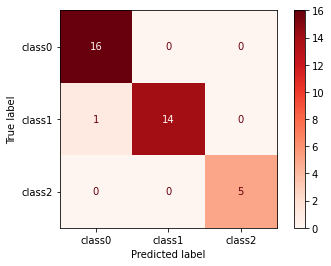

In [46]:
from sklearn.metrics import plot_confusion_matrix
labels=["class0", "class1", "class2"]
disp = plot_confusion_matrix(svclassifier1, X_test, y_test, 
                             cmap='Reds', values_format='d', 
                             display_labels=labels)